# Ayudantía 7

_Nicolás Barría y Pavel Medina_

# Antes de empezar:

Si estás en un notebook local (no colab) y estás recién empezando con este tipo de cosas, es probable que tengas que instalar ciertas librerías (varía un poco dependiendo del sistema/entorno desde el que se esté ejecutando):
- [numpy](https://numpy.org/install/)
- [pandas](https://pandas.pydata.org/docs/getting_started/install.html)
- [matplotlib](https://matplotlib.org/stable/users/installing/index.html)
- [seaborn](https://seaborn.pydata.org/installing.html)
- [scikit-learn](https://scikit-learn.org/stable/install.html)

Generalemente basta con un  `pip install <libreria>`


## **Datos**

Los datos son el pilar fundamental del aprendizaje automático, por lo que es una necesidad saber cómo manejar y limpiar datos para "alimentar" los modelos

### Abriendo archivos con Pandas

Pandas, la librería de Python, es una herramienta poderosa en lo que respecta al tratamiento de datos. No solo permite cargar datos en una amplia variedad de formatos (como csv, texto plano, hojas de Excel, entre otros), sino que permite hacer operaciones entre filas/columnas, conteo de valores, eliminación de filas o columnas, reemplazo de valores, conteo de valores nulos, entre muchas otras cosas. A continuación se hará uso de solo una pequeña fracción de todo su potencial.

Lo primero de todo es importar la librería:

In [1]:
import pandas as pd

Como se mencionó, Pandas permite abrir varios tipos de archivo:

Caso XLSX:

In [2]:
# Excel sheet
xlsx_ex = pd.read_excel("datos/ejemplo_data.xlsx")
xlsx_ex

,food_name,score,origin
0,choripan,9,Chile
1,pizza,8,Italia
2,ceviche,6,Peru


Caso CSV:

In [4]:
#  CSV
csv_ex = pd.read_csv("datos/ejemplo_data.csv", sep=";")
print("Original:")
display(csv_ex)

# se le puede indicar que cierta columna es el índice
csv_ex_idx = pd.read_csv("datos/ejemplo_data.csv", sep=";", index_col=0)
print("\n versión food_name como indices:")
display(csv_ex_idx)

# se le pueden reescribir los nombres a las columnas, si asi se desea
csv_ex = pd.read_csv("datos/ejemplo_data.csv", sep=";", header=0, names=["nombre comida", "puntaje", "origen", "ingredientes"])
print("\n versión renombrando columnas:")
display(csv_ex)


Original:


,food_name,score,origin,ingredients
0,choripan,9,Chile,"[longaniza,pan]"
1,choripan,5,China,"[carne,pan]"
2,pizza,8,Italia,"[masa,queso,tomate]"
3,ceviche,6,Peru,"[pescado,limon,cebolla]"



 versión food_name como indices:


,score,origin,ingredients
food_name,,,
choripan,9,Chile,"[longaniza,pan]"
choripan,5,China,"[carne,pan]"
pizza,8,Italia,"[masa,queso,tomate]"
ceviche,6,Peru,"[pescado,limon,cebolla]"



 versión renombrando columnas:


,nombre comida,puntaje,origen,ingredientes
0,choripan,9,Chile,"[longaniza,pan]"
1,choripan,5,China,"[carne,pan]"
2,pizza,8,Italia,"[masa,queso,tomate]"
3,ceviche,6,Peru,"[pescado,limon,cebolla]"


Acceso a filas especificas usando `.iloc[`posición`]` y `.loc[`indice`]`

In [5]:
# Acceso con posición
display(csv_ex_idx.iloc[2])
# Acceso con posición
display(csv_ex_idx.loc["ceviche"])
# display(csv_ex_idx.loc["choripan"]) # qué pasará?

score                            8
origin                      Italia
ingredients    [masa,queso,tomate]
Name: pizza, dtype: object

score                                 6
origin                             Peru
ingredients    [pescado,limon,cebolla] 
Name: ceviche, dtype: object

¿Cómo se comporta la lista que está como valor?

In [6]:
list_ej = csv_ex["ingredientes"][0]
list_ej

'[longaniza,pan]'

Tendremos que manejarla de algúna manera para que sea usable como lista

In [7]:
print(type(list_ej.strip("[]").split(",")))
list_ej.strip("[]").split(",")

<class 'list'>


['longaniza', 'pan']

Caso JSON:

In [8]:
# json
json_ex = pd.read_json("datos/ejemplo_data.json")
json_ex

,type,name,favorite_foods
0,dog,Duke,"[chicken, salmon, carrots]"
1,cat,Fluffy,"[tuna, turkey]"


Algo a notar es la diferencia entre print(dataframe) y display (dataframe)

In [9]:
print("Print:")
print(json_ex)

print("\nDisplay:")
display(json_ex)

Print:
  type    name              favorite_foods
0  dog    Duke  [chicken, salmon, carrots]
1  cat  Fluffy              [tuna, turkey]

Display:


,type,name,favorite_foods
0,dog,Duke,"[chicken, salmon, carrots]"
1,cat,Fluffy,"[tuna, turkey]"


Además, en el caso en que los valores son otras estructuras de datos (como listas), se pueden usar como tales

In [10]:
display(json_ex)

print("\n Esto es un pandas.Series")
display(json_ex["favorite_foods"]) # esto es un pandas.Series

print("\n Esto es un pandas.DataFrame")
display(json_ex[["favorite_foods"]]) # esto es un pandas.DataFrame

comida = json_ex["favorite_foods"][0]
print("\nEsto es lo importante:")
print(f'elemento de primera fila: {comida}')
print(f'tipo: {type(comida)}')
print(f'2do elemento: {comida[1]}') 

,type,name,favorite_foods
0,dog,Duke,"[chicken, salmon, carrots]"
1,cat,Fluffy,"[tuna, turkey]"



 Esto es un pandas.Series


0    [chicken, salmon, carrots]
1                [tuna, turkey]
Name: favorite_foods, dtype: object


 Esto es un pandas.DataFrame


,favorite_foods
0,"[chicken, salmon, carrots]"
1,"[tuna, turkey]"



Esto es lo importante:
elemento de primera fila: ['chicken', 'salmon', 'carrots']
tipo: <class 'list'>
2do elemento: salmon


### Manipulación de datos

#### Tipos de datos 
Constantemente se va a estar tratando con distintos tipos de datos, pero en las bases de datos los que más abundan son:
- texto (`str`)
- numéricos (`int`, `float`, `double`)
- fechas (`date`, `timestamp`)

¿Cómo tratar con estos?

# Ejemplo más real

En lo que sigue. se va a usar un _datset_ de música que se puede encontrar en [kaggle](https://www.kaggle.com/datasets/purumalgi/music-genre-classification?select=train.csv).

In [11]:
data = pd.read_csv("datos/musicGenre.csv")
data

,Artist Name,Track Name,Popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Genre_name
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.000000,4,HipHop
1,Boston,Hitch a Ride,54.0,0.382,0.814,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.000000,4,Rock
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.000000,4,Indie
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.000000,4,HipHop
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.000000,4,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Jerry Reed,Amos Moses,45.0,0.750,0.711,-10.633,1,0.0641,0.526000,0.000653,0.0282,0.9610,105.636,2.329333,4,Country
996,The Police,Every Breath You Take - Remastered 2003,NaN,0.820,0.452,-9.796,1,0.0348,0.543000,0.002940,0.0714,0.7370,117.401,253920.000000,4,Rock
997,MOD SUN,Amnesia,58.0,0.457,0.804,-4.756,0,0.0362,0.000206,NaN,0.1970,0.5230,155.022,171033.000000,4,Pop
998,The Killers,The World We Live In,51.0,0.597,0.852,-6.890,1,0.0248,0.026500,0.004250,0.2660,0.5590,105.996,278493.000000,4,Rock


#### Métodos `.head`, `.describe` & `.info`
Para poder hacer un analisis general de los datos se tienen ciertas funciones útiles:


`df.head(n:int)` muestra las primeras n filas del dataframe df, por defecto n=5. En contraposición está `df.tail(n:int)` que muestra las últimas n filas.

In [12]:
data.head(3)

,Artist Name,Track Name,Popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Genre_name
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,-4.964,1,0.0485,0.0171,NaN,0.0849,0.899,134.071,234596.0,4,HipHop
1,Boston,Hitch a Ride,54.0,0.382,0.814,-7.230,1,0.0406,0.0011,0.004010,0.1010,0.569,116.454,251733.0,4,Rock
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,-8.334,1,0.0525,0.4860,0.000196,0.3940,0.787,147.681,109667.0,4,Indie


`df.describe()` genera estadísticas descriptivas.
Las estadísticas descriptivas incluyen las que resumen la tendencia central, la dispersión y la forma de la distribución de un conjunto de datos, excluyendo los valores nulos.

In [13]:
data.describe()

,Popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
count,973.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,750.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000
mean,44.514902,0.551513,0.659784,-7.888312,0.648000,0.076149,0.251055,0.179730,0.192052,0.486088,122.415907,2.011291e+05,3.909000
std,17.974863,0.164510,0.233215,3.856631,0.477833,0.078565,0.308254,0.304277,0.160928,0.239852,29.322760,1.100990e+05,0.403586
min,1.000000,0.080900,0.014500,-31.366000,0.000000,0.023100,0.000002,0.000001,0.023300,0.033500,42.956000,1.365333e+00,1.000000
25%,32.000000,0.440750,0.506750,-9.747000,0.000000,0.034475,0.003947,0.000074,0.095075,0.298750,99.039250,1.673212e+05,4.000000
50%,44.000000,0.549500,0.681000,-7.062500,1.000000,0.045750,0.094600,0.003995,0.126000,0.471500,120.148500,2.093640e+05,4.000000
75%,57.000000,0.667000,0.859000,-5.160750,1.000000,0.079000,0.446000,0.207000,0.252250,0.673000,142.432000,2.499722e+05,4.000000
max,99.000000,0.967000,0.998000,0.878000,1.000000,0.730000,0.996000,0.972000,0.992000,0.979000,205.057000,1.083755e+06,5.000000


`df.info()` Devuelve un resumen conciso del DataFrame.

Este método imprime información sobre un DataFrame incluyendo el tipo de índice y las columnas, los valores no nulos y el uso de memoria.

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         1000 non-null   object 
 1   Track Name          1000 non-null   object 
 2   Popularity          973 non-null    float64
 3   danceability        1000 non-null   float64
 4   energy              1000 non-null   float64
 5   loudness            1000 non-null   float64
 6   mode                1000 non-null   int64  
 7   speechiness         1000 non-null   float64
 8   acousticness        1000 non-null   float64
 9   instrumentalness    750 non-null    float64
 10  liveness            1000 non-null   float64
 11  valence             1000 non-null   float64
 12  tempo               1000 non-null   float64
 13  duration_in min/ms  1000 non-null   float64
 14  time_signature      1000 non-null   int64  
 15  Genre_name          1000 non-null   object 
dtypes: floa

#### Operaciones columna y agrupaciones

- groupby
- applymap
- sumar columnas
- extraer categoría como números

`groupby()` Esto puede utilizarse para agrupar grandes cantidades de datos y calcular operaciones sobre estos grupos.

In [15]:
# Cuántos artistas tiene cada género?
print(data.groupby('Genre_name').count()['Artist Name'])

Genre_name
AcousticFolk     41
Alt              73
Blues            66
Bollywood        18
Country          21
HipHop           75
Indie           146
Instrumental     26
Metal            91
Pop             154
Rock            289
Name: Artist Name, dtype: int64


In [16]:
# Cuántas canciones tienen los 5 artistas con más canciones?
data.groupby('Artist Name').count()["Track Name"].sort_values(ascending=False)[:5]

Artist Name
Eyal Golan        6
Omer Adam         6
Sarit Hadad       3
Van Halen         3
Britney Spears    3
Name: Track Name, dtype: int64

`applymap()` Aplicar una función a lo largo de la entrada del DataFrame.

In [17]:
data2 = data[['Popularity', 'danceability']]
display(data2.head())
# Multipliquemos por 10 los valores de cada columna 
data2.applymap(lambda x: 10*x).head()

,Popularity,danceability
0,60.0,0.854
1,54.0,0.382
2,35.0,0.434
3,66.0,0.853
4,53.0,0.167


,Popularity,danceability
0,600.0,8.54
1,540.0,3.82
2,350.0,4.34
3,660.0,8.53
4,530.0,1.67


Otra de las acciones que puede hacerse de manera muy rápida gracias a pandas es el hacer operaciones con las columnas, por ejemplo: sumar.

In [18]:
import time
# caso usando pandas inteligentemente
initial_time = time.time()
data['Popularity'] + data['danceability']
print(time.time()-initial_time)

# caso usando for-loop
initial_time2 = time.time()
for index, row in data.iterrows():
  row['Popularity'] + row['danceability']
print(time.time() - initial_time2)

0.00899505615234375
0.1179969310760498


si consideramos que un dataset promedio tiene decenas de miles de filas, esta diferencia de valores es muy importante.

Por otra parte, si se va a usar un modelo para predecir categorías, es importante tenerlas como números y no como texto.

In [19]:
data["Genre_name"] = data["Genre_name"].astype('category')
data["Class"] = data["Genre_name"].cat.codes
data.head(5)

,Artist Name,Track Name,Popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Genre_name,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,HipHop,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,Rock,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,Indie,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,HipHop,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,Rock,10


#### Tratamiento de valores nulos

Vamos a revisar dos formas de tratar a los valores nulos. Primero veamos como esta  el dataset respecto a los valores nulos. Antes vimos que 

In [20]:
data.isna().sum()

Artist Name             0
Track Name              0
Popularity             27
danceability            0
energy                  0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness      250
liveness                0
valence                 0
tempo                   0
duration_in min/ms      0
time_signature          0
Genre_name              0
Class                   0
dtype: int64

Como se puede apreciar tenemos casi el 25% de los datos nulos en la columna de `instrumentalness` por lo que podríamos eliminar la columna porque no aporta mucho a la información que queremos obtener a través de los datos

In [21]:
data.drop('instrumentalness', axis = 1, inplace=True)
data.head()

,Artist Name,Track Name,Popularity,danceability,energy,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_in min/ms,time_signature,Genre_name,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,-4.964,1,0.0485,0.017100,0.0849,0.8990,134.071,234596.0,4,HipHop,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,-7.230,1,0.0406,0.001100,0.1010,0.5690,116.454,251733.0,4,Rock,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,-8.334,1,0.0525,0.486000,0.3940,0.7870,147.681,109667.0,4,Indie,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,-6.528,0,0.0555,0.021200,0.1220,0.5690,107.033,173968.0,4,HipHop,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,-4.279,1,0.2160,0.000169,0.1720,0.0918,199.060,229960.0,4,Rock,10


In [ ]:
# data.to_csv("filtrado.csv", index=False) # si quisieramos guardar este dataframe

Además podemos ver que tenemos 27 datos con Popularity nula. Como no representan muchos datos es preferible borrar esas tuplas a que toda la columna

In [22]:
data.dropna(subset=['Popularity'], inplace=True)
data.head()

,Artist Name,Track Name,Popularity,danceability,energy,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_in min/ms,time_signature,Genre_name,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,-4.964,1,0.0485,0.017100,0.0849,0.8990,134.071,234596.0,4,HipHop,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,-7.230,1,0.0406,0.001100,0.1010,0.5690,116.454,251733.0,4,Rock,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,-8.334,1,0.0525,0.486000,0.3940,0.7870,147.681,109667.0,4,Indie,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,-6.528,0,0.0555,0.021200,0.1220,0.5690,107.033,173968.0,4,HipHop,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,-4.279,1,0.2160,0.000169,0.1720,0.0918,199.060,229960.0,4,Rock,10


Podemos ver finalmente que nos quedamos sin datos con valor NULL

In [23]:
data.isna().sum()

Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
loudness              0
mode                  0
speechiness           0
acousticness          0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Genre_name            0
Class                 0
dtype: int64

### Tratamiento de fechas

Por último, pausando el ejemplo de género musical, tratamos con datos en formato fecha

In [3]:
# Fuemte de datos: https://www.enap.cl/pag/66/1295/tabla_de_precios_de_paridad
date_data = pd.read_excel("datos/precio_bencina_chile.xlsx")
display(date_data.head(3)) # veamos las primeras 3 filas
date_data.Fecha[0] # ¿cómo se ven las fechas?

,Fecha,93,97
0,2022-04-21 00:00:00,923.81,964.76
1,2022-04-14 00:00:00,905.96,935.75
2,2022-04-07 00:00:00,925.58,952.23


datetime.datetime(2022, 4, 21, 0, 0)

Supongamos que estamos interesados en saber el precio promedio por año:

In [4]:
dates = pd.to_datetime(date_data['Fecha'])

# https://stackoverflow.com/questions/11391969/how-to-group-pandas-dataframe-entries-by-date-in-a-non-unique-column
mean4year = date_data.groupby(dates.dt.year).mean() 

display(mean4year)
# mean4year.plot()

,93,97
Fecha,,
2017,526.863333,550.607500
2018,560.106731,587.082885
2019,507.565769,540.558077
2020,367.311132,388.131132
2021,598.367308,619.372692
2022,814.979375,838.455625


### Visualización de datos

#### Gráficos con MatPlotLib

Para hacer un gráfico de barra simple contando cuántos artistas hay por género

Genre_name
Rock            281
Pop             149
Indie           142
Metal            91
HipHop           73
Alt              73
Blues            65
AcousticFolk     35
Instrumental     26
Country          20
Bollywood        18
Name: Artist Name, dtype: int64

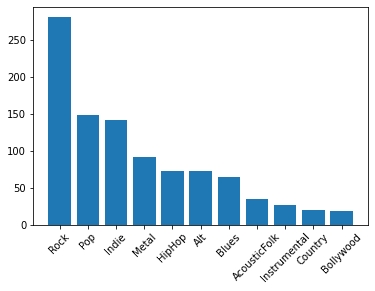

In [42]:
import matplotlib.pyplot as plt 
art4gnr = data.groupby('Genre_name').count()['Artist Name'].sort_values(ascending=False)

display(art4gnr)

plt.bar(art4gnr.index, art4gnr.values)
plt.xticks(rotation = 45)
plt.show()

Otro gráfico que es posible hacer es un histograma, en este caso haremos un histograma de la popularidad de las canciones con bins=3

In [27]:
data.Popularity.head()

0    60.0
1    54.0
2    35.0
3    66.0
4    53.0
Name: Popularity, dtype: float64

Como estos son datos continuos, podemos "secciónarlos" con `pd.cut(`arraylike`,`n_bins`)`

bin
(0.902, 33.667]     273
(33.667, 66.333]    591
(66.333, 99.0]      109
Name: Popularity, dtype: int64

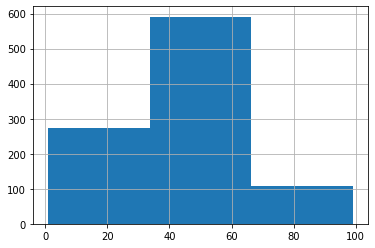

In [28]:
data['Popularity'].hist(bins=3)

data['bin'] = pd.cut(data['Popularity'], 3)
data.groupby('bin').count()['Popularity']

Otro gráfico que es posible hacer es un scatter plot en donde seteamos x e y para graficar, el tamaño tambien lo podemos poner dependiente a una variable, en este caso sería Popularity y los colores respecto a  la clase que pertenece (género)

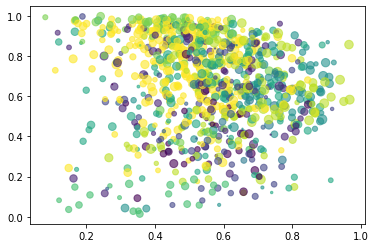

In [29]:
plt.scatter(x='danceability', y='energy', 
            alpha= 0.6,
            s=data['Popularity'], 
            c='Class', 
            # cmap='inferno',
            data=data)

Se le pueden agregar muchos detalles a los gráficos, como labels, leyendas, etc.
Volvamos a la base de datos de fechas y precios de bencinas

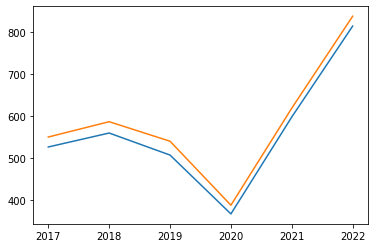

In [30]:
# display(mean4year)
# plt.plot(mean4year.index,mean4year[93])
plt.plot(mean4year.index,mean4year[93],mean4year.index,mean4year[97])
plt.show()

Puede mejorarse la presentación

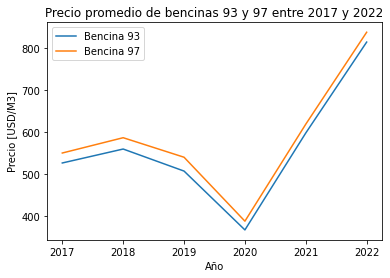

In [31]:
plt.plot(mean4year.index,mean4year[93], label = "B93")
plt.plot(mean4year.index,mean4year[97], label = "B97")
plt.title("Precio promedio de bencinas 93 y 97 entre 2017 y 2022")
plt.xlabel("Año")
plt.ylabel("Precio [USD/M3]")
plt.legend(["Bencina 93","Bencina 97"])
plt.show()

#### Uso de Seaborn para mejorar presentación

Una de las librerías que pueden utilizar para tener gráficos más bonitos es seaborn. A continuación se grafica el mismo histograma que fue graficado anteriormente

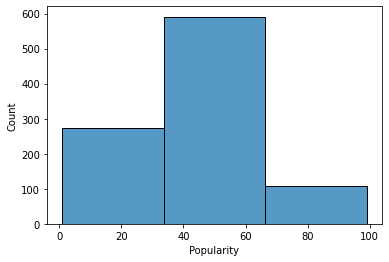

In [32]:
import seaborn as sb
sb.histplot(data=data['Popularity'], bins=3)
plt.show()

Una de las visualizaciones más útiles de Seaborn es el método `sn.pairplot(`subdata`)`

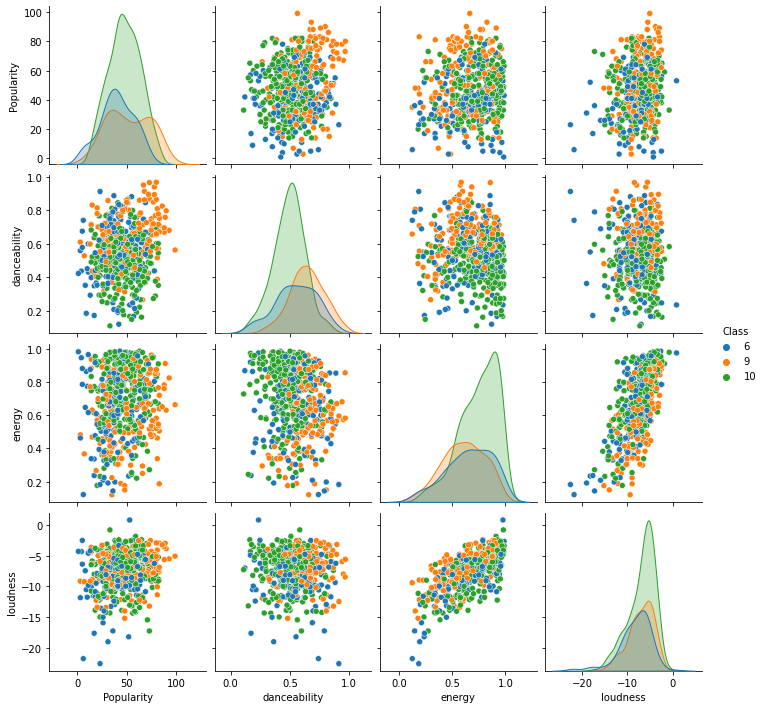

In [43]:
subdata = data[["Popularity","danceability","energy","loudness", "Class"]]

# Filtrado: elegimos solo 3 generos, [& ~ and] [| ~ or]
subdata = subdata[(subdata.Class == 10) | (subdata.Class == 9) | (subdata.Class == 6)]
sb.pairplot(subdata, hue="Class", palette='tab10')
# sb.pairplot(subdata, hue="Class", kind="kde", palette='tab10')
plt.show()

---
## **Introducción a Machine Learning**

### **Aprendizaje Supervisado** vs Aprendizaje No-supervisado vs Aprendizaje Reforzado 

<div>
<img src="https://miro.medium.com/max/600/1*Wt3xmQVeicIHcaQOskpx8Q.png" width="70%"/>
</div>

[Fuente](https://medium.com/@mehtapriyanka1pm/supervised-unsupervised-and-reinforcement-learning-246781f26730)

<h2>Ejemplo no supervisado: K-means</h2>
<div>
<img src="https://www.ecloudvalley.com/wp-content/uploads/2019/09/Unsupervised-learning.png" width="70%"/>
</div>

[Fuente deprecada](https://tercesa.com/noticias/reductor-de-velocidad-comprenda-su-importancia/engra/?ss=6_28_5_21_44&pp=unsupervised+learning&ii=4092897)

<h2>Ejemplo no supervisado: PCA</h2>
<div>
<img src="https://images2.programmerclick.com/486/03/0351bfe3610a3ba89bea599ee9d054ae.png" width="70%"/>
</div>

[Fuente](https://programmerclick.com/article/90051499108/)

<h2>Reforzado:</h2>
<div>
<img src="https://www.researchgate.net/publication/333884677/figure/fig2/AS:771670948212736@1560992099587/Basic-reinforcement-learning-model-When-the-Agent-performs-an-action-the-state-of-the_W640.jpg" width="70%"/>
</div>

[Fuente](https://www.researchgate.net/publication/333884677_On_the_improvement_of_reinforcement_active_learning_with_the_involvement_of_cross_entropy_to_address_one-shot_learning_problem/figures?lo=1&utm_source=google&utm_medium=organic)

### **Clasificación** vs  Regresión

<div>
<img src="https://i.pinimg.com/736x/5a/27/68/5a276845073df4d7761e284e99f4669c.jpg" width="50%"/>
</div>

[Fuente](https://in.pinterest.com/pin/729231364647517568/)


#### Clasificaciones: Binaria, Multi-Clase y Multi-Etiqueta

<h2>Binaria</h2>
<div>
<img src="https://miro.medium.com/proxy/1*fBjniQPOKigqxYSKEumXoA.png" width="60%"/>
</div>

[Fuente](https://medium.com/datos-y-ciencia/aprendizaje-supervisado-introducci%C3%B3n-a-la-clasificaci%C3%B3n-y-principales-algoritmos-dadee99c9407)

<h2>Multi-Clase</h2>
<div>
<img src="http://scikit-hep.org/root_numpy/_images/plot_multiclass_1.png" width="60%"/>
</div>

[Fuente](http://scikit-hep.org/root_numpy/auto_examples/tmva/plot_multiclass.html)

<h2>Multi-Etiqueta</h2>
<div>
<img src="https://stemkitreview.com/wp-content/uploads/2021/02/Object-detection.jpg" width="70%"/>
</div>

[Fuente](https://stemkitreview.com/object-detection-feb2021/)

#### Algoritmos de clasificación: **Árboles de decisión**, *Naive-Bayes*, **Support Vector Machines**, KNN, etc.

<div>
<img src="https://forum.huawei.com/enterprise/en/data/attachment/forum/202103/24/190400o09x7rhnnhy2yon7.png?1.png" width="70%"/>
</div>

[Fuente](https://forum.huawei.com/enterprise/en/machine-learning-algorithms-decision-trees/thread/710283-895)

<div>
<img src="https://ih1.redbubble.net/image.994663259.7701/pp,504x498-pad,600x600,f8f8f8.jpg" width="70%"/>
</div>

[Fuente](https://www.redbubble.com/es/i/lamina-fotografica/Divertido-dise%C3%B1o-de-inteligencia-artificial-aprendizaje-autom%C3%A1tico-con-if-de-omolog/43107701.6Q0TX)

<div>
<img src="https://paulvanderlaken.files.wordpress.com/2020/03/readme-titanic_plot-11.png" width="70%"/>
</div>

[Fuente](https://paulvanderlaken.com/2020/03/31/visualizing-decision-tree-partition-and-decision-boundaries/)

### Separación de datos: _*Train-Val-Test*_

Para poder entrenar un modelo, necesitamos entrenarlo, ajustar sus hiperparámetros y probar cómo se comporta en escenarios no vistos.

Volvamos al dataset de géneros musicales, en particular a subdata, que tenia solo 3 clases

In [44]:
from sklearn.model_selection import train_test_split

subdata.head()
# Armamos nuestras features clasificadoras
X = subdata[["Popularity", "danceability", "energy", "loudness"]].to_numpy()
print(f"Tamaño de X: {X.shape}")
y = subdata.Class.to_numpy()
print(f"Tamaño de y: {y.shape}")


Tamaño de X: (572, 4)
Tamaño de y: (572,)


In [45]:
# separamos con modelo 60-30-10
X_train, X_tst, y_train, y_tst = train_test_split(X, y, train_size = 0.6, stratify = y)
print(f"Tamaño de set de entrenamiento: {X_train.shape}\nTamaño de set de 'testeo': {X_tst.shape}")

Tamaño de set de entrenamiento: (343, 4)
Tamaño de set de 'testeo': (229, 4)


¿faltó el test de validación?


In [46]:
X_val, X_tst, y_val, y_tst = train_test_split(X_tst, y_tst, train_size = 0.75, stratify = y_tst)
print(f"Tamaño de set de entrenamiento: {X_val.shape}\nTamaño de set de testeo: {X_tst.shape}")

Tamaño de set de entrenamiento: (171, 4)
Tamaño de set de 'testeo': (58, 4)


Con eso, dividimos el set de 'testeo', y llegamos a 3 sets disjuntos y estratificados

### Métricas

Es necesario definir bajo qué métrica vamos a estar optimizando nuestro modelo, algunas métricas son: 
- accuracy
- precision
- recall

<h2>Resúmen de métricas</h2>
<div>
<img src="https://www.researchgate.net/publication/336402347/figure/fig3/AS:812472659349505@1570719985505/Calculation-of-Precision-Recall-and-Accuracy-in-the-confusion-matrix.ppm" width="60%"/>
</div>

[Fuente](https://www.researchgate.net/publication/336402347_Analyzing_the_Leading_Causes_of_Traffic_Fatalities_Using_XGBoost_and_Grid-Based_Analysis_A_City_Management_Perspective/figures?lo=1)



### Entrenamiento y predicción ilustrativos

Para darle sentido a lo que vimos y usamos, vamos a usar un clasificador que se verá en el curso, pero sin entrar en muchos detalles: SVM 

Warn

In [79]:
import random
random.seed(50) # plantamos una semilla para que no cambien mucho los resultados

In [80]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# vamos a plantar una semilla para que no var
# nuestro modelo se instancia

for ker in ["sigmoid","poly", "rbf"]:
  model = SVC(kernel=ker) 

  # lo entrenamos
  model.fit(X_train, y_train)

  # predecimos valores
  predicho = model.predict(X_val)

  # vemos cuanto puntaje tenemos. Entre más, mejor
  print(f"Accuracy obtenido con SVM kernel {ker}: {accuracy_score(y_val, predicho)}")




Accuracy obtenido con SVM kernel sigmoid: 0.4619883040935672
Accuracy obtenido con SVM kernel poly: 0.49122807017543857
Accuracy obtenido con SVM kernel rbf: 0.5029239766081871


Nos quedamos con el RBF, porque tiene mejor desempeño. Vamos a juntar el set de entrenamiento y validación para entrenar nuevamente.
Aquí es donde termina el trabajo del set validador como tal, así que podemos darle un nuevo uso.

In [81]:
import numpy as np

X_trainval = np.concatenate([X_train,X_val])
y_trainval = np.concatenate([y_train,y_val])

# Así vamos a tener un set de entrenamiento con más ejemplos. Como ya ajustamos hiper parámetros no es necesario el set de validación
X_trainval.shape, y_trainval.shape

((514, 4), (514,))

In [82]:
model = SVC(kernel="rbf")
model.fit(X_trainval, y_trainval)

# Ahora, finalmente, usamos set de testeo
predicho = model.predict(X_tst)
accuracy_score(y_tst, predicho)

0.5344827586206896

Se puede reportar de manera mejor?

Ya vimos un ejemplo antes: Matriz de confusión

In [83]:
from sklearn.metrics import confusion_matrix 

conf_mat = confusion_matrix(y_tst, predicho)
conf_mat

array([[ 0,  0, 15],
       [ 0,  3, 12],
       [ 0,  0, 28]], dtype=int64)

Puede ser más bonito?

Sí, con seaborn

<AxesSubplot:>

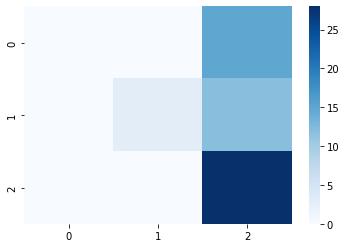

In [84]:
sb.heatmap(conf_mat, cmap="Blues")

### Extra: Underfitting/Overfitting
<div>
<img src="https://miro.medium.com/max/1200/1*YQ5tjb1TqNHenYMFk2tPog.png" width="70%"/>
</div>

[Fuente](https://rubialesalberto.medium.com/qu%C3%A9-es-underfitting-y-overfitting-c73d51ffd3f9)

<h2>Ejemplo: perros y gatos</h2>
<div>
<img src="https://i.pinimg.com/originals/5d/09/74/5d0974693a94fdbc65c2cc493c826616.jpg" width="60%"/>
</div>

[Fuente](https://ar.pinterest.com/pin/686165693208481265/)

<div>
<img src="https://imagenes.elpais.com/resizer/d47-M2uJ_br-ScMLVs0c4SqS7Q8=/414x0/cloudfront-eu-central-1.images.arcpublishing.com/prisa/HOJP5HZRJFUP6BFFN654JSL33I.jpg" width="70%"/>
</div>

[Fuente](https://elpais.com/internacional/2018/09/19/mundo_global/1537385823_063960.html)


<h2>¿Cómo debería predecir esto?</h2>
<div>
<img src="https://soyunperro.com/wp-content/uploads/2017/10/chihuahuatipos.jpg" width="70%"/>
</div>

[Fuente](https://soyunperro.com/tipos-chihuahua-toy/)

Veamos los datos que se tienen para gatos y perros. Importaremos ```cv2```, librería sumamente conocida en el ámbito de imágenes y visión por computador

In [ ]:
import cv2

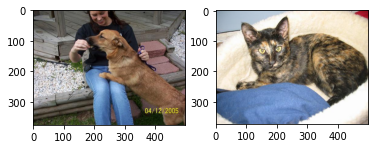

In [ ]:
example_dog = cv2.imread('datos/CatsDog/data/Dog/52.jpg')
example_cat = cv2.imread('datos/CatsDog/data/Cat/31.jpg')
fig = plt.figure()
fig.add_subplot(1,2,1)
plt.imshow(example_dog[:,:,::-1])
fig.add_subplot(1,2,2)
plt.imshow(example_cat[:,:,::-1])
plt.show()

A continuación veremos que las imágenes no son del mismo tamaño por lo que necesitaremos hacer un resize para tener todas las imágenes dentro del mismo tamaño y junto con esto obtener la misma cantidad de features por imagen

In [ ]:
print(example_dog.shape)
example_cat.shape

(377, 500, 3)


(375, 500, 3)

In [ ]:
def create_image_features(image, size=(250,250), name=''):
  # resize image
  image = cv2.resize(image,size)
  # flatten image
  pixel_list = image.flatten()
  return pixel_list

Procesaremos las imágenes de train y de test para que queden todas del mismo tamaño

In [ ]:
import os
dog_training_images = [f for f in os.listdir('datos/CatsDog/data/Dog') if not f.startswith('.')]
cat_training_images = [f for f in os.listdir('datos/CatsDog/data/Cat') if not f.startswith('.')]
raw_images = []
labels = []
for name_image in dog_training_images:
  image = cv2.imread(f"datos/CatsDog/data/Dog/{name_image}")
  raw_images.append(create_image_features(image))
  labels.append(0)

for name_image in cat_training_images:
  image = cv2.imread(f"datos/CatsDog/data/Cat/{name_image}")
  raw_images.append(create_image_features(image))
  labels.append(1)

Ahora ocmo ya tenemos todas las imágenes, dividiremos nuestros datos en train y test.

In [ ]:
raw_images = np.array(raw_images)
labels = np.array(labels)

(train_X, test_X, train_y, test_y) = train_test_split(
    raw_images, labels, test_size=0.25, random_state=0)

In [ ]:
model = SVC(kernel='rbf') 

# lo entrenamos
model.fit(train_X, train_y)

predicts = model.predict(test_X)
accuracy_score(test_y, predicts)

0.56

Ahora graficaremos en una matriz de confusión para ver de mejor forma su rendimiento

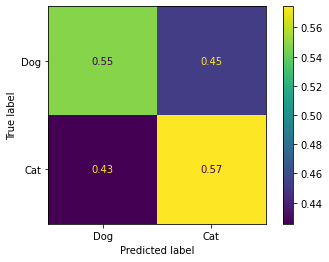

In [ ]:
conf_mat = confusion_matrix(test_y, predicts, normalize='true')
cmd = ConfusionMatrixDisplay(conf_mat, display_labels=['Dog','Cat'])
cmd.plot()